In [ ]:
import re
import matplotlib.pyplot as plt

def parse_log(file_path):
    epochs = []
    train_losses = []
    test_losses = []
    test_rmses = []
    test_accs = []

    train_pattern = r"Epoch (\d+) \(train\).*?loglike is ([\-\d\.]+)"
    test_pattern = r"Epoch (\d+) \(test\).*?loglike is ([\-\d\.]+).*?acc is ([\d\.]+).*?rmse is ([\d\.]+)"

    with open(file_path, 'r') as file:
        lines = file.readlines()

    for line in lines:
        train_match = re.search(train_pattern, line)
        test_match = re.search(test_pattern, line)

        if train_match:
            epoch = int(train_match.group(1))
            train_loss = float(train_match.group(2))
            if epoch not in epochs:
                epochs.append(epoch)
            train_losses.append(train_loss)

        if test_match:
            test_loss = float(test_match.group(2))
            test_acc = float(test_match.group(3))
            test_rmse = float(test_match.group(4))
            test_losses.append(test_loss)
            test_accs.append(test_acc)
            test_rmses.append(test_rmse)

    return epochs, train_losses, test_losses, test_rmses, test_accs

In [2]:
RMTPP2_taxi = r"C:\Users\A\Desktop\CS675\Project\checkpoints\28460_27080_241204-132928\log"
RMTPP3_taxi = r"C:\Users\A\Desktop\CS675\Project\checkpoints\5484_21812_241204-152159\log"
RMTPP_taxi = r"C:\Users\A\Desktop\CS675\Project\checkpoints\32484_31476_241204-123653\log"

In [3]:
taxi_epochs1, taxi_train_losses1, taxi_test_losses1, taxi_test_rmses1, taxi_test_accs1 = parse_log(RMTPP_taxi)
taxi_epochs2, taxi_train_losses2, taxi_test_losses2, taxi_test_rmses2, taxi_test_accs2 = parse_log(RMTPP2_taxi)
taxi_epochs3, taxi_train_losses3, taxi_test_losses3, taxi_test_rmses3, taxi_test_accs3 = parse_log(RMTPP3_taxi)

In [4]:
RMTPP2_taobao = r"C:\Users\A\Desktop\CS675\Project\checkpoints\16544_4972_241204-180047\log"
RMTPP3_taobao = r"C:\Users\A\Desktop\CS675\Project\checkpoints\30976_17324_241204-175347\log"
RMTPP_taobao = r"C:\Users\A\Desktop\CS675\Project\checkpoints\36392_33772_241204-182605\log"

In [5]:
taobao_epochs1, taobao_train_losses1, taobao_test_losses1, taobao_test_rmses1, taobao_test_accs1 = parse_log(RMTPP_taobao)
taobao_epochs2, taobao_train_losses2, taobao_test_losses2, taobao_test_rmses2, taobao_test_accs2 = parse_log(RMTPP2_taobao)
taobao_epochs3, taobao_train_losses3, taobao_test_losses3, taobao_test_rmses3, taobao_test_accs3 = parse_log(RMTPP3_taobao)

In [6]:
taxi_acc_final_values = [taxi_test_accs1[-1], taxi_test_accs2[-1], taxi_test_accs3[-1], 0.8484]
taxi_rmse_final_values = [taxi_test_rmses1[-1], taxi_test_rmses2[-1], taxi_test_rmses3[-1], 0.3545]

taobao_acc_final_values = [taobao_test_accs1[-1], taobao_test_accs2[-1], taobao_test_accs3[-1], 0.5168]
taobao_rmse_final_values = [taobao_test_rmses1[-1], taobao_test_rmses2[-1], taobao_test_rmses3[-1],  0.2077]

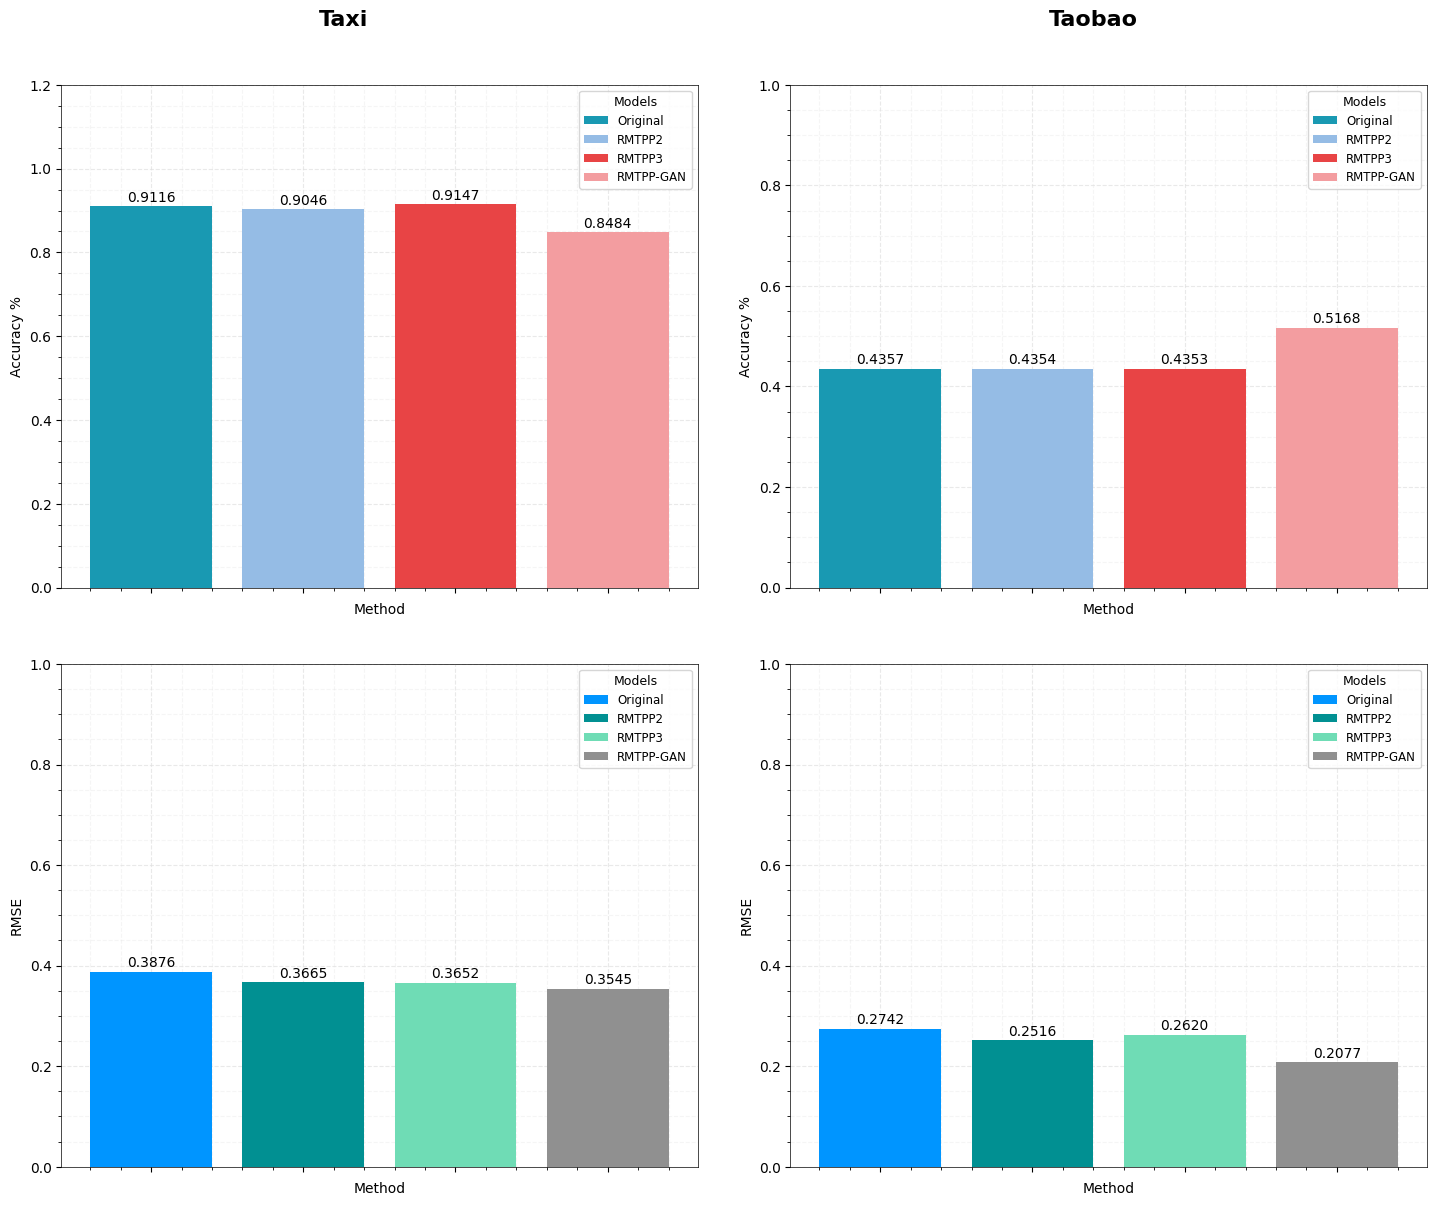

In [ ]:
models = ['Original', 'RMTPP2', 'RMTPP3', 'RMTPP-GAN']
ACC_colors = ['#1999B2', '#95BCE5', '#E84445', '#F39DA0']
RMSE_colors = ['#0095FF', '#019092', '#6FDCB5', '#909090']

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 12))
fig.patch.set_facecolor('white')

grid_params = {
    'linestyle': '--',
    'alpha': 0.7,
    'color': '#E0E0E0',
    'zorder': 0
}

def plot_subplot(ax, data, ylabel, colors, dataset):

    ax.grid(True, which='both', **grid_params)
    

    x = range(len(data)) 
    bars = ax.bar(x, data, color=colors, zorder=3)
    
    ax.set_ylabel(ylabel)
    ax.set_xlabel('Method')
    ax.set_facecolor('white')

    if 'RMSE' in ylabel and dataset == 'Taobao':
        ax.set_ylim(0, 1.2)
    if 'Accuracy' in ylabel and dataset == 'Taxi':
        ax.set_ylim(0, 1.2)
    else:
        ax.set_ylim(0, 1)

    for i, v in enumerate(data):
        ax.text(i, v + 0.01, f'{v:.4f}', ha='center', fontsize=10, zorder=4)
    
    for spine in ax.spines.values():
        spine.set_visible(True)
        spine.set_linewidth(0.5)
        spine.set_color('black')
    
    legend_elements = [plt.Rectangle((0,0),1,1, facecolor=color) for color in colors]
    ax.legend(legend_elements, models,
             loc='upper right',
             bbox_to_anchor=(1, 1),
             title='Models',
             fontsize=8.5,
             title_fontsize=9)
    
    ax.grid(True, which='major', **grid_params)
    ax.minorticks_on()
    ax.grid(True, which='minor', **{**grid_params, 'alpha': 0.3})
    

    ax.set_xticks(x)
    ax.set_xticklabels([''] * len(x))  

plot_subplot(ax1, taxi_acc_final_values, 'Accuracy %', ACC_colors, 'Taxi')
plot_subplot(ax2, taobao_acc_final_values, 'Accuracy %', ACC_colors, 'Taobao')
plot_subplot(ax3, taxi_rmse_final_values, 'RMSE', RMSE_colors, 'Taxi')
plot_subplot(ax4, taobao_rmse_final_values, 'RMSE', RMSE_colors, 'Taobao')

fig.text(0.25, 1.01, 'Taxi', ha='center', fontsize=16, weight='bold')
fig.text(0.75, 1.01, 'Taobao', ha='center', fontsize=16, weight='bold')

plt.tight_layout(pad=3.0)

plt.show()

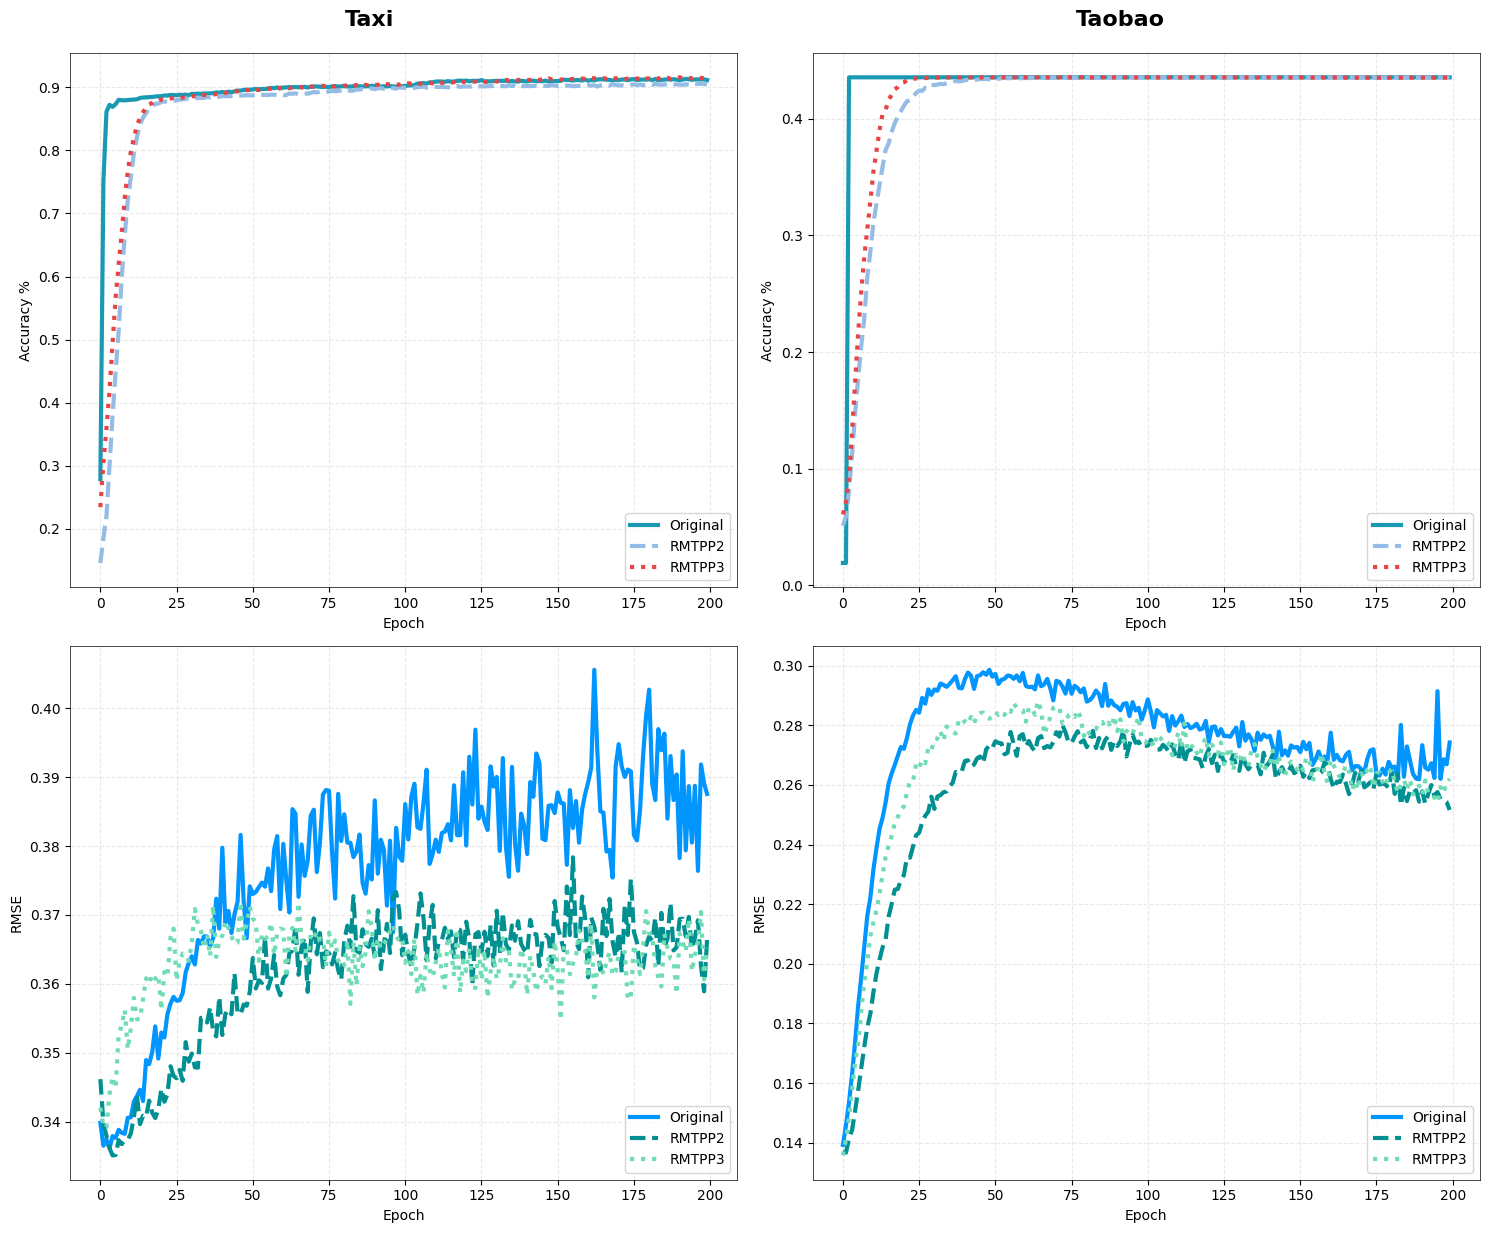

In [ ]:
import matplotlib.pyplot as plt

models = ['Original', 'RMTPP2', 'RMTPP3']
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 12))
fig.patch.set_facecolor('white')

grid_params = {
   'linestyle': '--',
   'alpha': 0.7, 
   'color': '#E0E0E0'
}

line_styles = ['-', '--', ':']
ACC_colors = ['#1999B2', '#95BCE5', '#E84445']
RMSE_colors = ['#0095FF', '#019092', '#6FDCB5']

def plot_metric(ax, epochs_list, metrics_list, ylabel, dataset, colors):
   for i, (epochs, metric) in enumerate(zip(epochs_list, metrics_list)):
       ax.plot(epochs, metric, color=colors[i], linestyle=line_styles[i], 
               label=models[i], linewidth=3)
   
   ax.grid(True, **grid_params)
   ax.set_xlabel('Epoch')
   ax.set_ylabel(ylabel)
   ax.legend(loc='lower right')
   
   for spine in ax.spines.values():
       spine.set_visible(True)
       spine.set_linewidth(0.5)

plot_metric(ax3, [taxi_epochs1, taxi_epochs2, taxi_epochs3], 
          [taxi_test_rmses1, taxi_test_rmses2, taxi_test_rmses3],
          'RMSE', 'Taxi', RMSE_colors)

plot_metric(ax1, [taxi_epochs1, taxi_epochs2, taxi_epochs3],
          [taxi_test_accs1, taxi_test_accs2, taxi_test_accs3],
          'Accuracy %', 'Taxi', ACC_colors)

plot_metric(ax4, [taobao_epochs1, taobao_epochs2, taobao_epochs3],
          [taobao_test_rmses1, taobao_test_rmses2, taobao_test_rmses3],
          'RMSE', 'Taobao', RMSE_colors)

plot_metric(ax2, [taobao_epochs1, taobao_epochs2, taobao_epochs3],
          [taobao_test_accs1, taobao_test_accs2, taobao_test_accs3],
          'Accuracy %', 'Taobao', ACC_colors)

fig.text(0.25, 1.01, 'Taxi', ha='center', fontsize=16, weight='bold')
fig.text(0.75, 1.01, 'Taobao', ha='center', fontsize=16, weight='bold')

plt.tight_layout()
plt.show()